*   ベースディレクトリと、出力ディレクトリを設定します。

In [25]:
############################################
BaseDir      = 'IntroDDSJpn/Chap02/'
OutputDir    = '2Bayes-0202DiseaseRate/'
FileBaseName = '2Bayes-0202DiseaseRate'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [26]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [27]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
# import pandas as pd
# print('pandas     Ver.', pd.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Bayes-0202DiseaseRate/
 d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Bayes-0202DiseaseRate/ is exist.


* 検査の信頼性


 検査結果 | 陽性 ( ${\sf C}$ ) | 陰性 ( $\overline{{\sf C}}$ )
---|:---:|:---:
罹患している( ${\sf A}$ ) | 95% | 5%
罹患していない( $\overline{{\sf A}}$ ) | 5% | 95%


* 検査の信頼性の確率

  * $P({\sf C}|{\sf A})=0.95$, $P(\overline{{\sf C}}|{\sf A})=0.05$
  * $P(\overline{{\sf C}}|{\sf A})=0.05$, $P(\overline{{\sf C}}|\overline{{\sf A}})=0.95$

* 全人口に対する統計から、病気の罹患率を0.5%とする。
  $$
  P({\sf A})=0.005
  $$

* 検査で陽性となったとき、本当に罹患している確率$P({\sf A}|{\sf C})$は?
  $$
  P({\sf A}|{\sf C})
  =
  \frac{P({\sf C}|{\sf A})}{P({\sf C})}
  P({\sf A})
  $$

* $P({\sf C})=\underbrace{P({\sf C}|{\sf A})P({\sf A})}_{正しい検診}+\underbrace{P({\sf C}|\overline{{\sf A}})P(\overline{{\sf A}})}_{誤診}$

* $\therefore$
  $$
  P({\sf A}|{\sf C})
  =
  \frac{
    0.95
  }{
    0.95\times0.005
    +
    0.05\times0.995
  }
  \times
  0.005
  \approx
  0.087
  =8.7\%{}
$$



---



* 全人口に対する統計から、病気の罹患率を0.5%とする。
    $$
    P({\sf A})=0.005
    $$

In [28]:
############################################
P_A = 0.005

検査の信頼性: Credibility (45% $\sim$ 100%の等差数列で用意)

In [29]:
############################################
Credibility =np.linspace(0.45,1.0, num=1101)

罹患率(%)をベイズ推定で計算する

In [30]:
############################################
def DiseaseRate( Credibility, P_A ):
  #
  P_notA      = 1.0 - P_A
  #
  P_C_A       = Credibility
  P_notC_A    = 1.0 - P_C_A
  P_notC_notA = Credibility
  P_C_notA    = 1.0 - P_notC_notA
  #
  P_C = P_C_A * P_A + P_C_notA * P_notA
  #
  return P_C_A / P_C * P_A * 100

検査の信頼性が50%の場合

In [31]:
############################################
Disease050 = DiseaseRate( 0.5, P_A )
print( Disease050 )

0.5


検査の信頼性が95%の場合

In [32]:
############################################
Disease095 = DiseaseRate( 0.95, P_A )
print( Disease095 )

8.715596330275222


検査の信頼性: Credibility (45% $\sim$ 100%の等差数列で用意)

In [33]:
############################################
Credibility =np.linspace(0.45,1.0, num=1101)

検査の信頼性による罹患率の変化を計算する。

In [34]:
############################################
DiseasePercent = DiseaseRate( Credibility, P_A )

グラフを描く

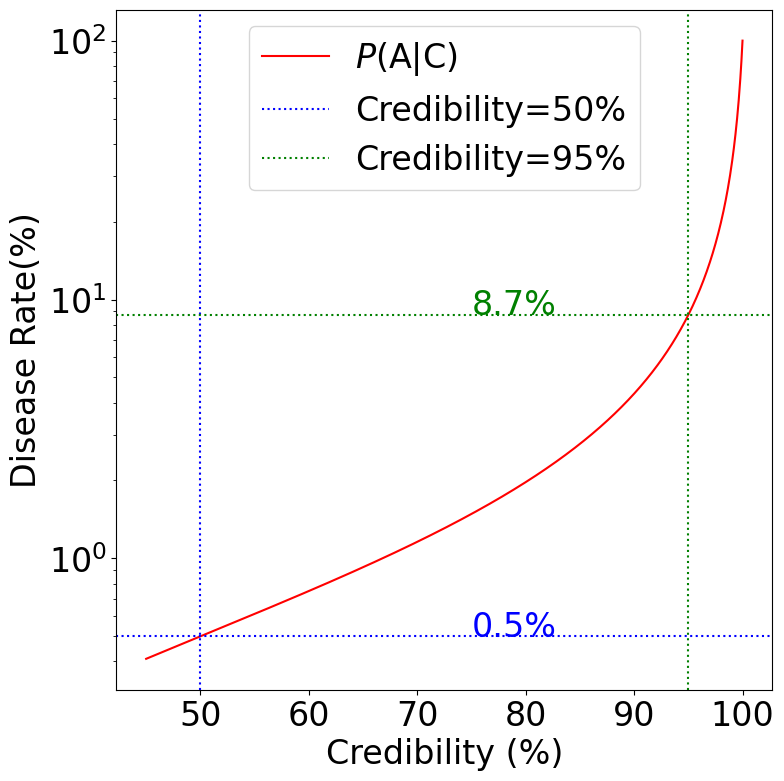

In [35]:
############################################
plt.rcParams['font.size'] = 24
#
fig = plt.figure( figsize=(8,8) )
#
fig.subplots_adjust(left=0.15, right=0.97, top=0.97, bottom=0.12)
#
ax1 = fig.add_subplot(1,1,1)
#
ax1.set_xlabel( 'Credibility (%)' )
ax1.set_xticks([50,60, 70, 80, 90, 100])
#
ax1.set_yscale('log')
ax1.set_ylabel( 'Disease Rate(%)' )
#
ax1.plot( Credibility*100, DiseasePercent, color='red', label=r'$P({\sf A}|{\sf C})$' )
#
# 信頼性 50%
ax1.axhline( Disease050, 0, 1.0, color='blue', linestyle='dotted', label='Credibility=50%' )
ax1.axvline( 50, 0, 1.0, color='blue', linestyle='dotted' )
ax1.text(75, Disease050, '%.1f%%' % Disease050, color='blue' )
#
# 信頼性 95%
ax1.axhline( Disease095, 0, 1.0, color='green', linestyle='dotted', label='Credibility=95%' )
ax1.axvline( 95, 0, 1.0, color='green', linestyle='dotted' )
ax1.text(75, Disease095, '%.1f%%' % Disease095, color='green' )
#
plt.legend()
#
plt.show()

In [ ]:
############################################
# 図をpdfに保存
pdfName = FilePath + FileBaseName + '.pdf'
fig.savefig( pdfName )

: 